импорты

In [21]:
import os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
import re
import pandas as pd
from scipy import signal

константы

In [22]:
# 153.8336486816406250 884.2712384333286764    измеряемый диапазон. 0-2136 диапазон данных
start = 400  # нм
end = 700  # нм
step = (884.2712384333286764 - 153.8336486816406250) / 2136
print(step)


def nm_to_x(nm):
    return round((nm - start) / step)


def x_to_nm(index):
    return index * step + start


print(154.2240601661054029 - 153.8336486816406250)
print(8.842712384333286764e02 - 8.839834256089930022e02)
# номера точек в массиве по координате х
start_point = round((start - 153.8336486816406250) / step)
end_point = start_point + int((end - start) / step)
lamp_point = nm_to_x(565)
mean_point = nm_to_x(650)
min_point = nm_to_x(420)
print(start_point, end_point)
x = np.arange(start + step, end, step)

0.341965163741427
0.3904114844647779
0.2878128243356741
720 1597


функции получения данных

In [24]:
def get_rmr(spec):
    y = []
    spec = re.split(",", spec)
    y = list(map(float, spec[start_point + 11 : end_point + 11]))
    return y


def get_txt(spec):
    y = []
    spec = re.split("\n|\t", spec)
    for j in range(start_point, end_point):
        y.append(spec[j * 2 + 15].replace(",", "."))
    return y


def get_csv(spec):
    y = []
    spec = re.split("\n|,", spec)
    for j in range(656 * 2 + 1, 1532 * 2 + 1, 2):
        y.append(spec[j].replace(",", "."))

    return y


def get_data_rmr(path):
    """получение всей папки в виде списка с массивами np"""
    _file_list = np.array(natsorted(os.listdir(path)))
    _data = []
    for file in range(len(_file_list)):
        with open(path + _file_list[file], "r", encoding="utf8") as spec:
            spec = spec.read()
        spec = re.split(",", spec)
        _data.append(np.array(spec[start_point + 11 : end_point + 11], dtype=float))
    #    _data.append(get_rmr(spec))
    return _data


def get_data_csv(path):
    """получение всей папки в виде списка с массивами np"""
    _file_list = np.array(natsorted(os.listdir(path)))
    _data = []
    for file in range(len(_file_list)):
        with open(path + _file_list[file], "r", encoding="utf8") as spec:
            spec = spec.read()
            _data.append(np.array(get_csv(spec), dtype=float))
    #    _data.append(get_rmr(spec))
    return _data


def get_base(base_folder):
    b = []
    for a in ("/dark.csv", "/light.csv", "/bg.csv"):
        with open(base_folder + a, "r", encoding="utf8") as spec:
            spec = spec.read()
            b.append(np.array(get_csv(spec), dtype=float))
    return b


def calc(mas, dark, light, bg):
    a = mas - bg
    b = light - bg
    c = a / b
    d = np.log10(c)
    q = d * (-1)
    return q

получение данных из необработанных спектров

In [ ]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
data_row = []  # изанчальные графики
data = []  # сглаженные графики

main_folder = r"C:\Users\Nik\Desktop\prog\08-12-2023_Zagrebaev_Au_NPs\T=20\1-1"
main_folder = main_folder.replace(chr(92), "/")
folders_list = np.array(natsorted(os.listdir(main_folder)))
print(main_folder)

base = get_base(main_folder + "/base")
m = 20
folders_list = folders_list[2:]
# m=len(folders_list)

for i in range(len(folders_list)):
    data_row.append(get_data_csv(main_folder + "/" + folders_list[i] + "/"))

print("получено " + str(len(data_row)) + " папок")

In [ ]:
# пересчет спектров
for i in range(1, len(data_row)):
    _d = []

    for j in range(len(data_row[i])):
        _d.append(calc(data_row[i][j], base[0], base[1], base[2]))

    data.append(_d)

In [ ]:
# построение темного, светлого и фонового спектров
x = np.arange(len(data[0][0]))


plt.subplots(figsize=(8, 8))


plt.plot(x, signal.savgol_filter(base[0], 60, 3), label="dark")


plt.plot(x, signal.savgol_filter(base[1], 60, 3), label="light")


plt.plot(x, signal.savgol_filter(base[2], 60, 3), label="bg")


plt.plot(x, signal.savgol_filter(data_row[5][5], 60, 3), label="spectr")


plt.legend()

In [ ]:
print(folders_list)

In [ ]:
x1 = np.arange(len(data[0][0]))
for i in range(0, 60):
    fig, axs = plt.subplots(1, 1, figsize=(8, 8))
    for j in range(len(data[i])):
        axs.plot(x, data[i][j], lw=0.2)
    axs.set_title(str(folders_list[i]) + " " + str(len(data[i])))

получение данных из rmr

In [25]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
data_row = []  # изанчальные графики
data = []  # сглаженные графики
smooth = False
main_folder = r"C:\Users\Nik\Desktop\prog\только rmr"
main_folder = main_folder.replace(chr(92), "/")
folders_list = np.array(natsorted(os.listdir(main_folder)))
print(main_folder)
print(folders_list)


for i in range(len(folders_list)):
    data_row.append(get_data_rmr(main_folder + "/" + folders_list[i] + "/"))
    # print("data from " + str(folders_list[i]) + " recived")
print("получено " + str(len(data_row)) + " папок")

if smooth == True:
    for i in range(len(data_row)):
        d = []
        for j in range(len(data_row[i])):
            d.append(signal.savgol_filter(data_row[i][j], 60, 3))
        data.append(d)
else:
    data = data_row.copy()

C:/Users/Nik/Desktop/prog/только rmr
['15' '16' '17' '18' '19' '20' '25' '26' '27' '28' '29' '30' '31']
получено 13 папок


функции выборки максимума и разницы

In [26]:
# функции для получения данных
def dmax(mas: np.array):
    return np.max(mas)


def dmax_650(mas: np.array):
    return np.max(mas) - mas[mean_point]


def dmax_list(mas: list):
    _max = []
    for a in mas:
        _max.append(np.max(a))
    return _max


def dmax_650_list(mas: list):
    _max = []
    for i in range(len(mas)):
        _max.append(np.max(mas[i]) - mas[i][mean_point])
    return _max

In [ ]:
# попытка построить в 3д
new_data = np.nan_to_num(np.array(data[5]), nan=0)
x = np.arange(len(new_data))
y = np.arange(len(new_data[0]))
X, Y = np.meshgrid(y, x)
Z = new_data
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(1, 2, 1, projection="3d")
surf = ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5, antialiased=False)

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.plot_surface(Y, X, Z, cmap="viridis", alpha=0.5, antialiased=False)

построение из 1 папки n графиков

368


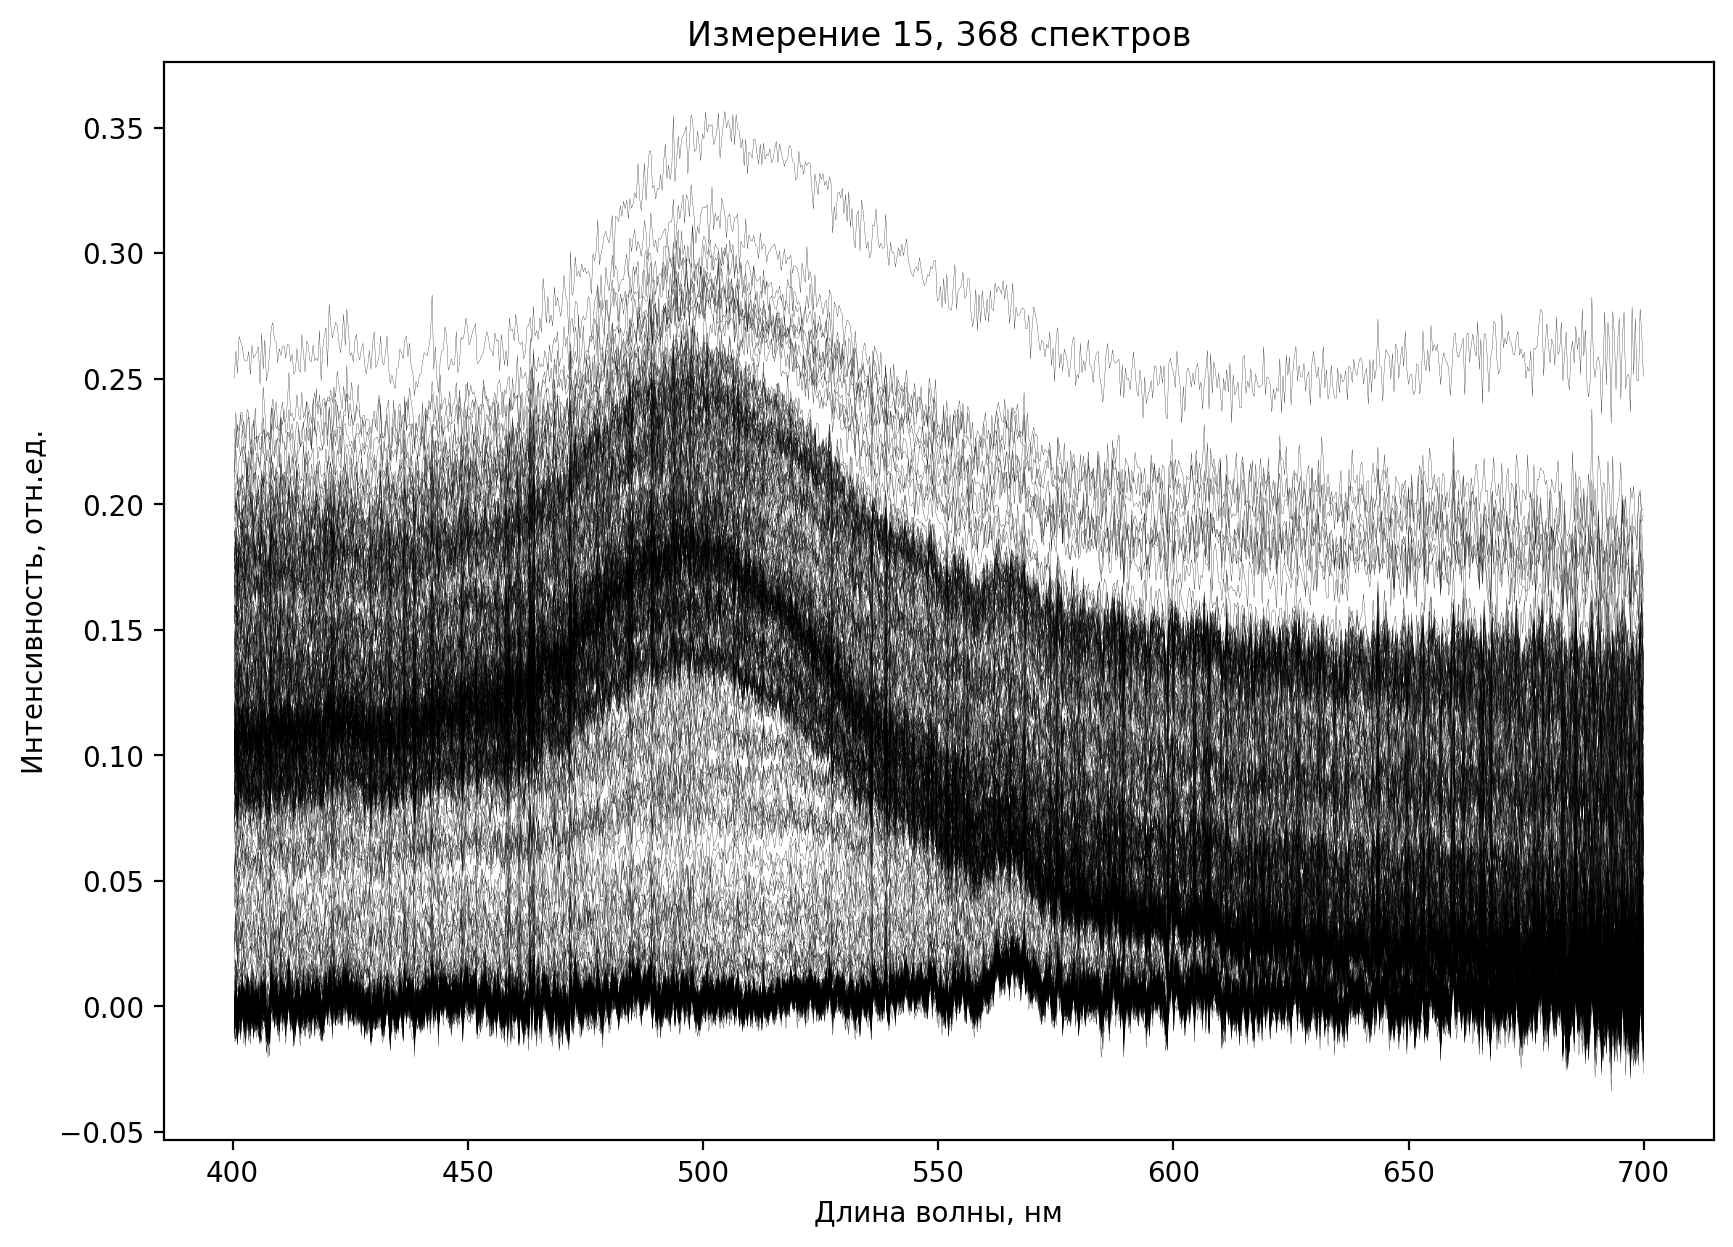

In [27]:
# просто посмотреть график в какойто папке
# ['15' '16' '17' '18' '19' '20' '25' '26' '27' '28' '29' '30' '31']
#  0    1    2    3    4    5    6    7    8    9    10   11   12
n = 0
# for i in range(len(data[n])):
#   data[n][i]=data[n][i][700:1600]
plt.figure(figsize=(10, 7), dpi=200)
for i in range(len(data[n])):
    plt.plot(x, data[n][i], lw=0.1, color="black")
plt.title("Измерение 15, " + str(len(data[n])) + " спектров")
plt.xlabel("Длина волны, нм")
plt.ylabel("Интенсивность, отн.ед.")
print(len(data[n]))

таймлайн

In [ ]:
print(len(data[0][0]))

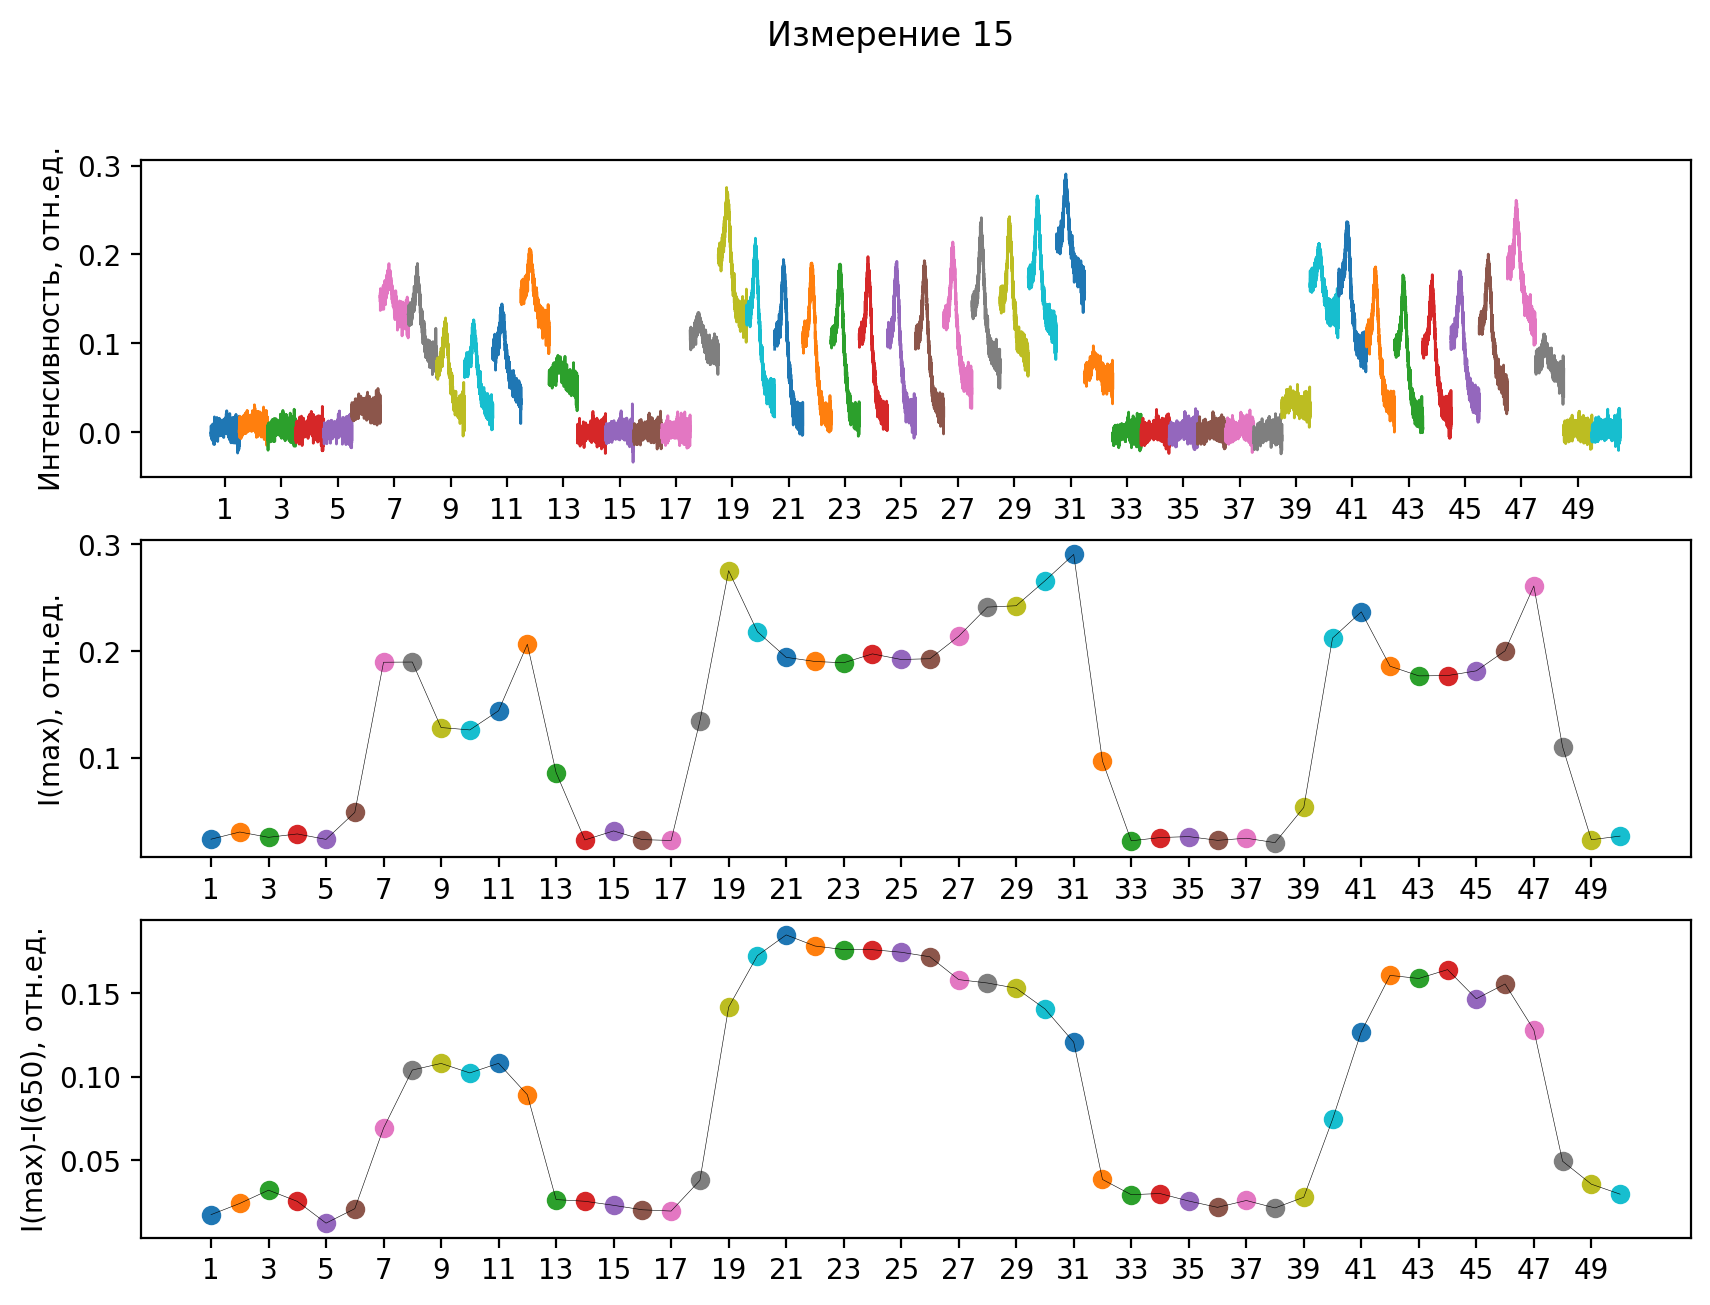

In [28]:
print_grafs = False
for _folder in range(1):
    _a = 50
    if len(data[_folder]) < 50:
        _a = len(data[_folder])
    _mas = data[_folder][1 : _a + 1]  # 100 cпектров из папки
    # for i in range(len(_mas)):
    #    _mas[i] = signal.savgol_filter(_mas[i], 60, 3)

    # plt.subplots(figsize=[10, 10]);plt.clf()
    fig, axs = plt.subplots(3, 1, figsize=(10, 7), dpi=200)

    # fig.tit title("синтез " + str(folders_list[_folder]))
    fig.suptitle("Измерение " + str(folders_list[_folder]))

    _sp = 0
    for i in range(len(_mas)):
        axs[0].plot(np.arange(_sp, _sp + len(_mas[i])), _mas[i], lw=1)
        _sp += len(_mas[i])
    # axs[0].set_ylim(-0.05, 0.5)
    axs[0].set_ylabel("Интенсивность, отн.ед.")
    # axs[0].set_xticklabels(np.arange(0,_sp),np.arange(0,30))
    q = np.arange(0 + 877 / 2, 877 * _a + 877 / 2, 877 * 2)
    axs[0].set_xticks(q, labels=np.arange(1, _a + 1, 2))
    # axs[0].axes.tick_params(axis='x',which='minor',direction='out',bottom=True,length=80)

    axs[1].set_ylabel("I(max), отн.ед.")
    minus = dmax_list(_mas)
    for i in range(len(_mas)):
        axs[1].scatter(i, minus[i])
    axs[1].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    axs[1].set_xticks(np.arange(0, 50, 2), labels=np.arange(1, _a + 1, 2))

    axs[2].set_ylabel("I(max)-I(650), отн.ед.")
    minus = dmax_650_list(_mas)
    for i in range(len(_mas)):
        axs[2].scatter(i, minus[i])
    axs[2].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    axs[2].set_xticks(np.arange(0, 50, 2), labels=np.arange(1, _a + 1, 2))
    if print_grafs == True:
        plt.savefig("timelane/" + str(folders_list[_folder]) + ".png")

# fig.clf();fig.clear()

первый способ выборки

In [ ]:
# пострение гистограм
def data_for_hist(mas, ind):
    ar = np.zeros(len(mas))
    if ind == "max":
        for i in range(len(mas)):
            ar[i] = np.max(mas[i])
    else:
        for i in range(len(mas)):
            ar[i] = mas[i][ind]
    return ar


def histograma(mas):
    hist, bins = np.histogram(mas, bins=50)
    hist = hist[5:]
    bins = bins[5:-1]
    return bins, hist


def kde(x):
    dx = x.max() - x.min()
    if dx == 0:
        return [x[0] - 1, x[0] - 0.01, x[0], x[0] + 0.01, x[0] + 1], [0, 0, 1, 0, 0]
    kde_sk = KernelDensity(bandwidth=dx / 100, kernel="gaussian")
    kde_sk.fit(x.reshape([-1, 1]))
    eval_points = np.linspace(x.min() - dx * 0.1, x.max() + dx * 0.1, 50)
    y_sk = np.exp(kde_sk.score_samples(eval_points.reshape(-1, 1)))
    return eval_points, y_sk


for n in range(len(folders_list)):
    masiv = data[n].copy()
    ar_max = data_for_hist(masiv, "max")
    ar_mean = data_for_hist(masiv, mean_point)
    ar_max_mean = np.divide(ar_max, ar_mean)

    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    axs[0].plot(*kde(ar_max), color="blue", label="KDE")
    axs[0].plot(*histograma(ar_max), color="red", label="гистограмма")

    bins, hist = histograma(ar_max)
    axs[0].set_title(str(folders_list[n]) + " распределение в точке максимума")

    axs[0].legend()

    gap = 0.01
    maximum = bins[np.argmax(hist)]
    ar = []
    for i in range(len(ar_max)):
        if maximum - gap <= ar_max[i] <= maximum + gap:
            ar.append(i)
    print(len(ar))
    print(ar)

    for i in range(len(masiv)):
        axs[1].plot(x, masiv[i], color="black", lw=0.01)

    for i in range(len(ar)):
        axs[1].plot(x, masiv[ar[i]], color="blue", lw=0.05)

    mas = []
    mins = []
    for i in range(len(ar)):
        mins.append(masiv[ar[i]][mean_point])
    mins = np.min(mins)
    for i in range(len(ar)):
        if masiv[ar[i]][mean_point] <= mins + 2 * gap:
            mas.append(masiv[ar[i]])
            axs[1].plot(x, masiv[ar[i]], color="red", lw=0.05)
    print(len(mas))
    axs[1].set_title("выбранные графики " + str(len(mas)) + "/" + str(len(masiv)))
    # plt.savefig("chosing/" + str(folders_list[n]) + ".png")

второй способ выборки

In [32]:
def data_for_hist(mas, ind):
    ar = np.zeros(len(mas))
    if ind == "max":
        for i in range(len(mas)):
            ar[i] = np.max(mas[i])
    else:
        for i in range(len(mas)):
            ar[i] = mas[i][ind]
    return ar


data_new = []
gap = 0.02
for n in range(len(folders_list)):
    masiv = data[n]
    _d = []
    ar_max = data_for_hist(masiv, "max")
    ar_mean = data_for_hist(masiv, mean_point)
    ar_max_mean = ar_max - ar_mean

    maximum = np.max(ar_max_mean)
    ar = []  # индексы спектров с наибольшей разницей между мах и 650
    for i in range(len(ar_max_mean)):
        if ar_max_mean[i] > maximum - gap:
            ar.append(i)
    # if len(ar) == 0:
    # continue
    ar2 = []  # значения интенсивнотей в точке max
    for i in range(len(ar)):
        ar2.append(np.max(masiv[ar[i]]))
    minimum = np.min(ar2)

    ar3 = []  # индексы более подходящих спектров
    for i in range(len(ar)):
        if np.max(masiv[ar[i]]) < minimum + gap:
            ar3.append(ar[i])
    for i in range(len(ar3)):
        _d.append(masiv[ar3[i]])
    data_new.append(_d)

In [62]:
spec = []  # сглаженный
spec_row = []  # не сглаженный


for i in range(len(data_new)):
    _a = len(data_new[i])


    _b = np.sum(data_new[i], axis=0)

    _b /= _a


    spec.append(signal.savgol_filter(_b, 100, 3))
    spec_row.append(_b)

0.19265489868741079 0.19246160768586154 0.192208683367146
0.16833002187012563 0.1681158389498409 0.16780357070431265
0.19636437762377687 0.19640290945068342 0.19628962231129377
0.2315399660329962 0.2314874855142763 0.23133588640017957
0.2359128958768749 0.23589951485941793 0.23562468420425772
0.25443056854848595 0.25444187785960876 0.25452472815679866
0.16901447965530506 0.1688125974747455 0.16856180424945927
0.16317408876473516 0.16292801788291883 0.16271913450397543
0.22703298467174182 0.22705742010117325 0.2271653063339157
0.24241478787874576 0.24250686067010857 0.24259229043989314
0.19560636688592103 0.19570733973820717 0.19603876014190197
0.22111525773427299 0.22103973104082159 0.22114280134920766
0.22677206070013584 0.22670363275271546 0.2268716620136521


(0.17, 0.21)

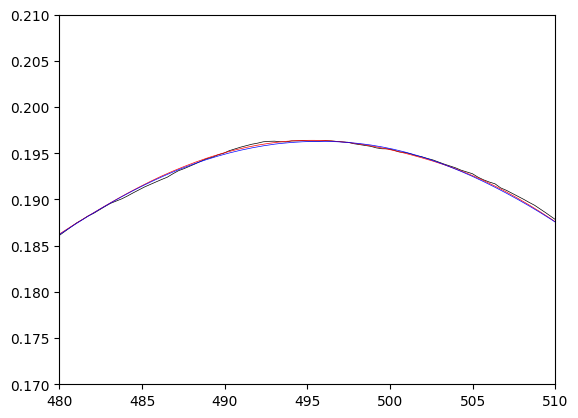

In [63]:
for i in range(len(spec)):
    print(
        np.max(spec[i]),
        np.max(signal.savgol_filter(spec[i], 60, 3)),
        np.max(signal.savgol_filter(spec[i], 100, 3)),
    )
n = 2
plt.plot(x, spec[n], lw=0.5, color="black")
plt.plot(x, signal.savgol_filter(spec[n], 60, 3), lw=0.5, color="red")
plt.plot(x, signal.savgol_filter(spec[n], 100, 3), lw=0.5, color="blue")
plt.xlim(480, 510)
plt.ylim(0.17, 0.21)

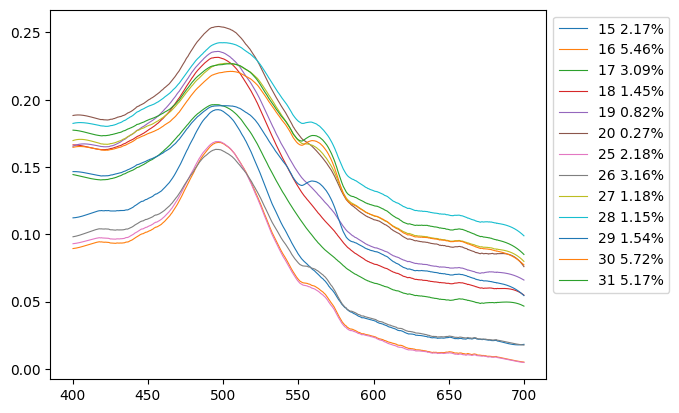

In [64]:
# построение красивых итоговых графиков
for i in range(len(spec)):
    plt.plot(
        x,
        spec[i],
        lw=0.8,
        label=str(folders_list[i])
        + " "
        + str(round(len(data_new[i]) * 100 / len(data[i]), 2))
        + "%",
    )


plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [ ]:
plt.figure(figsize=(10, 7), dpi=200)
for i in range(len(data[n])):
    plt.plot(x, data[n][i], lw=0.1, color="black")
plt.title("Измерение 15, " + str(len(data[n])) + " спектров")
plt.xlabel("Длина волны, нм")
plt.ylabel("Интенсивность, отн.ед.")
print(len(data_new[n]))
for i in range(len(ar)):
    plt.plot(x, data_new[n][ar[i]], lw=0.4, color="blue")
for i in range(len(ar3)):
    plt.plot(x, data_new[n][ar3[i]], lw=0.4, color="red")

дескрипторы

In [117]:
def coef_parabola(sp):
    """коэффициенты параболы"""
    _m = np.max(sp)
    _gap = 0.005
    _i = np.argmax(sp)
    _p, _q = 0, 0
    for i in range(_i, _i + 300):
        if sp[i] < _m - _gap:
            _q = i
            break
    for i in range(_i, _i - 300, -1):
        if sp[i] < _m - _gap:
            _p = i


            break

    _coefs = np.polyfit(
        x[_p:_q], sp[_p:_q], 2

    )  # Вторым аргументом передается степень полинома
    return _coefs


def w_h_75(sp):
    """ширина, высота"""
    _h = np.max(sp) - (np.max(sp) - np.min(sp[0 : round(len(sp) / 3)])) * 0.25
    _start, _end = 0, 0
    _ind_max = np.argmax(sp)
    for i in range(_ind_max, _ind_max + 300):
        if sp[i] <= _h:
            _end = i
            break
    for i in range(_ind_max, _ind_max - 300, -1):
        if sp[i] <= _h:
            _start = i
            break
    _w = x_to_nm(_end) - x_to_nm(_start)
    return (_w, _h)


def angle(sp, point):
    _x1 = x_to_nm(np.argmax(sp))
    _y1 = np.max(sp)
    _x2 = point
    _y2 = sp[nm_to_x(point)]
    return (_y2 - _y1) / (_x2 - _x1)

In [123]:
# выбор максимума
S_name = pd.Series(folders_list)
S_Imax = pd.Series(name="I(max)")
S_NMmax = pd.Series(name="I nm")
S_I650 = pd.Series(name="I(650)")
S_Imax_m_I650 = pd.Series(name="I(max)-I(650)")
S_I400 = pd.Series(name="I(400)")
S_Imax_m_I400 = pd.Series(name="I(max)-I(400)")
S_coef_a = pd.Series(name="coef A")
S_height = pd.Series(name="height")
S_weight = pd.Series(name="weight")
S_angle = pd.Series(name="ang")
_sp = nm_to_x(400)
for i in range(len(spec)):
    S_Imax.loc[i] = np.max(spec[i])
    S_NMmax.loc[i] = x_to_nm(np.argmax(spec[i]))
    S_I650.loc[i] = spec[i][mean_point]
    S_Imax_m_I650.loc[i] = S_Imax.loc[i] - S_I650.loc[i]
    S_I400.loc[i] = spec[i][_sp]
    S_Imax_m_I400.loc[i] = S_Imax.loc[i] / S_I400.loc[i]
    S_coef_a.loc[i] = coef_parabola(spec[i])[0]
    _w_h = w_h_75(spec[i])
    S_height.loc[i] = _w_h[0]
    S_weight.loc[i] = _w_h[1]
    S_angle.loc[i] = angle(spec[i], 570)
plt.plot(np.arange(13), S_weight)

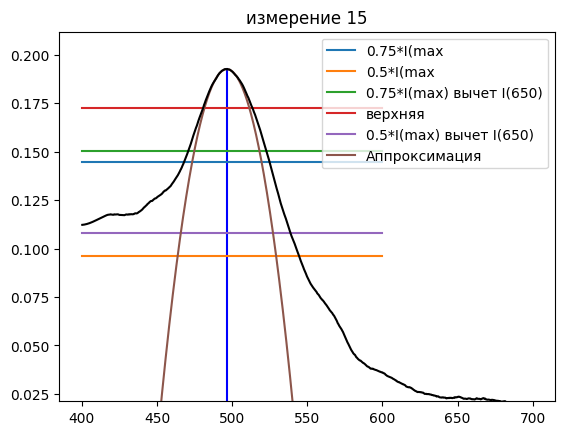

In [96]:
# построение параболы и кучи линий
n = 0



ind = x_to_nm(np.argmax(spec[n]))
max = np.max(spec[n])



mean = spec[n][nm_to_x(650)]


plt.plot((ind, ind), (0, max), color="blue")
q = 0.75



def h(_max, _650, coe):
    return _max - coe * (_max - _650)


def o(sp):
    return np.max(sp) - (np.max(sp) - np.min(sp[0 : round(len(sp) / 3)])) * 0.25



parabola = np.poly1d(coef_parabola(spec[n]))


plt.title("измерение " + str(folders_list[n]))
plt.plot((400, 600), (max * q, max * q), label="0.75*I(max")
plt.plot((400, 600), (max * 0.5, max * 0.5), label="0.5*I(max")


plt.plot(
    (400, 600),
    (h(max, mean, 0.25), h(max, mean, 0.25)),
    label="0.75*I(max) вычет I(650)",
)
plt.plot((400, 600), (o(spec[n]), o(spec[n])), label="верхняя")


plt.plot(
    (400, 600), (h(max, mean, 0.5), h(max, mean, 0.5)), label="0.5*I(max) вычет I(650)"
)



plt.plot(x[100:500], parabola(x[100:500]), label="Аппроксимация")



plt.plot(x, spec[n], color="black")



plt.ylim(mean * 0.9, max * 1.1)



plt.legend()

построение карт

In [98]:
import sys

sys.path.append(r"C:\Users\Nik\Desktop\pfy")
from pyfitit import *
import pandas as pd

In [124]:
data_speed = pd.read_excel("speed.xlsx")
data_measure = pd.concat(
    [
        S_Imax,
        S_NMmax,
        S_I650,
        S_Imax_m_I650,
        S_I400,
        S_Imax_m_I400,
        S_coef_a,
        S_height,
        S_weight,
        S_angle,
    ],
    axis=1,
)
data_table = pd.concat([data_speed, data_measure], axis=1)
print(data_table.columns[5:])

Index(['I(max)', 'I nm', 'I(650)', 'I(max)-I(650)', 'I(400)', 'I(max)-I(400)',
       'coef A', 'height', 'weight', 'ang'],
      dtype='object')


Try predict by: ['v АК', 'v ЦН']
Best model params:  {'n_estimators': 40, 'min_samples_leaf': 1} Delta =0.25952478894410747
ang - regression score: {'R2-score': 0.8051940236483562, 'MAE': 0.00010494501172587025, 'MAX': 0.00029452656021901964, 'RMSE': 0.00013409899792076144}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0}



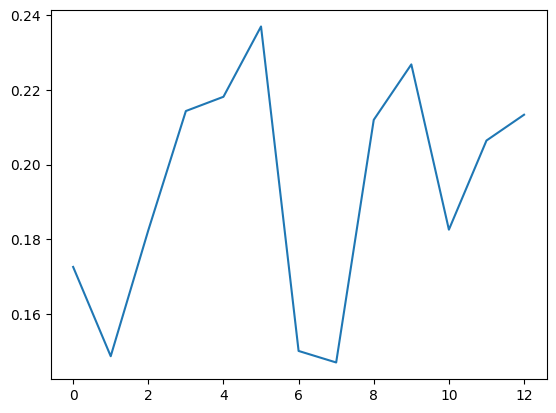

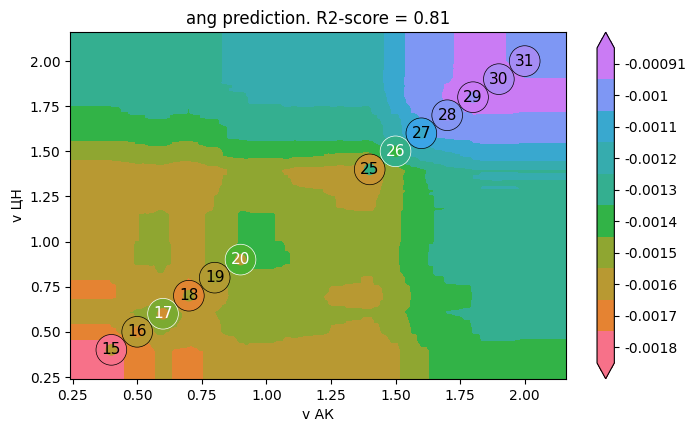

In [125]:
plotDescriptors2d(
    data_table,
    descriptorNames=["v АК", "v ЦН"],
    # labelNames=data_table.columns[5:],
    labelNames=["ang"],
    textColumn=data_table.columns[0],
    cv_count=30,
    # unknown="unknown.params",
    folder_prefix="results/descriptors",
)